In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#import data
from google.colab import files
uploaded=files.upload()

Saving Crude_Oil_Historical_Data.csv to Crude_Oil_Historical_Data (1).csv


In [7]:
data=pd.read_csv("Crude_Oil_Historical_Data.csv")

In [8]:
data.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
0,08/21/2019,55.68,56.05,57.13,55.55,704.04K,-1.17%
1,08/20/2019,56.34,56.10,56.60,55.28,47.45K,0.23%
2,08/19/2019,56.21,54.96,56.41,54.84,113.57K,2.44%
3,08/16/2019,54.87,54.74,55.67,54.26,168.35K,0.73%
4,08/15/2019,54.47,54.90,55.33,53.77,527.87K,-1.38%


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5000 non-null   object 
 1   Price     5000 non-null   float64
 2   Open      5000 non-null   float64
 3   High      5000 non-null   float64
 4   Low       5000 non-null   float64
 5   Vol.      4930 non-null   object 
 6   Change %  5000 non-null   object 
dtypes: float64(4), object(3)
memory usage: 273.6+ KB


In [10]:
data['Date']=pd.to_datetime(data['Date'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5000 non-null   datetime64[ns]
 1   Price     5000 non-null   float64       
 2   Open      5000 non-null   float64       
 3   High      5000 non-null   float64       
 4   Low       5000 non-null   float64       
 5   Vol.      4930 non-null   object        
 6   Change %  5000 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 273.6+ KB


In [12]:
data.isnull().sum()

Date         0
Price        0
Open         0
High         0
Low          0
Vol.        70
Change %     0
dtype: int64

As we are condisdering supervised learning we need only X and Y values for the prediction i.e Price and Date so we will drop the other columns from the data frame

In [13]:
data.drop(['Open', 'High','Low','Vol.','Change %'], axis=1)

,Date,Price
0,2019-08-21,55.68
1,2019-08-20,56.34
2,2019-08-19,56.21
3,2019-08-16,54.87
4,2019-08-15,54.47
...,...,...
4995,2000-01-10,24.67
4996,2000-01-07,24.22
4997,2000-01-06,24.78
4998,2000-01-05,24.91


In [14]:
#check for duplicate values
data.duplicated().sum()

0

In [15]:
#convert date into list
date=data.Date.tolist()

In [16]:
#checking for consequtive dates
from datetime import datetime, timedelta
# using loop for iterating all elements
res = True
for idx in range(1, len(date)):

    # checking for 1 day time difference
    if (date[idx - 1] - date[idx]).days != 1:
        res = False
        break
# printing result
print("Are dates consecutive : " + str(res))

Are dates consecutive : False


In [17]:
data["Date"] = pd.to_datetime(data.Date,format="%b-%y")  #changing the date format to YYYY-MM-DD

In [18]:
import datetime
len_of_date=len(data.Date)     #length of the date
start=data.Date[0]
end=data.Date[len_of_date-1]
new_dates = pd.date_range(start=end,end=start,freq='D')

In [19]:
start

Timestamp('2019-08-21 00:00:00')

In [20]:
end

Timestamp('2000-01-04 00:00:00')

In [21]:
new_dates     #new dates

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-08', '2000-01-09', '2000-01-10', '2000-01-11',
               '2000-01-12', '2000-01-13',
               ...
               '2019-08-12', '2019-08-13', '2019-08-14', '2019-08-15',
               '2019-08-16', '2019-08-17', '2019-08-18', '2019-08-19',
               '2019-08-20', '2019-08-21'],
              dtype='datetime64[ns]', length=7170, freq='D')

In [22]:
data = data.set_index('Date')    #we are setting Date acolumn as our index

In [23]:
data.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-08-21,55.68,56.05,57.13,55.55,704.04K,-1.17%
2019-08-20,56.34,56.10,56.60,55.28,47.45K,0.23%
2019-08-19,56.21,54.96,56.41,54.84,113.57K,2.44%
2019-08-16,54.87,54.74,55.67,54.26,168.35K,0.73%
2019-08-15,54.47,54.90,55.33,53.77,527.87K,-1.38%


In [24]:
data = data.reindex(new_dates)     #we have index as Date but we will re-index it with our new dates which we generated.
data = data.rename_axis('date')      #we are renaming it as date.
print(data)

            Price   Open   High    Low     Vol. Change %
date                                                    
2000-01-04  25.55  25.20  25.69  24.71   74.79K   -0.20%
2000-01-05  24.91  25.50  25.61  24.87   70.94K   -2.50%
2000-01-06  24.78  24.80  25.34  24.51   85.25K   -0.52%
2000-01-07  24.22  24.65  25.00  24.15   91.83K   -2.26%
2000-01-08    NaN    NaN    NaN    NaN      NaN      NaN
...           ...    ...    ...    ...      ...      ...
2019-08-17    NaN    NaN    NaN    NaN      NaN      NaN
2019-08-18    NaN    NaN    NaN    NaN      NaN      NaN
2019-08-19  56.21  54.96  56.41  54.84  113.57K    2.44%
2019-08-20  56.34  56.10  56.60  55.28   47.45K    0.23%
2019-08-21  55.68  56.05  57.13  55.55  704.04K   -1.17%

[7170 rows x 6 columns]


In [25]:
data.isnull().sum()     #Now if we check, 2160 null values are present.

Price       2170
Open        2170
High        2170
Low         2170
Vol.        2240
Change %    2170
dtype: int64

Using LOCF(Last observation Carry forward) method to impute the missing values

In [26]:
data['Price']=data['Price'].fillna(method ='bfill')

In [27]:
data.isnull().sum()        #Now if we check the null values again, it is zero.

Price          0
Open        2170
High        2170
Low         2170
Vol.        2240
Change %    2170
dtype: int64

In [28]:
data.describe()

,Price,Open,High,Low
count,7170.000000,5000.000000,5000.000000,5000.000000
mean,61.937464,62.009766,62.908414,61.048820
std,26.455995,26.340652,26.590383,26.042623
min,17.450000,17.300000,18.250000,16.700000
25%,39.812500,40.672500,41.665000,39.827500
50%,59.000000,59.100000,59.900000,58.140000
75%,83.230000,82.985000,84.412500,81.722500
max,145.290000,145.190000,147.270000,143.220000


In [29]:
data.shape

(7170, 6)

Data Visualization

In [30]:
df=data.drop(['Open', 'High','Low','Vol.','Change %'], axis=1)
df

,Price
date,
2000-01-04,25.55
2000-01-05,24.91
2000-01-06,24.78
2000-01-07,24.22
2000-01-08,24.67
...,...
2019-08-17,56.21
2019-08-18,56.21
2019-08-19,56.21


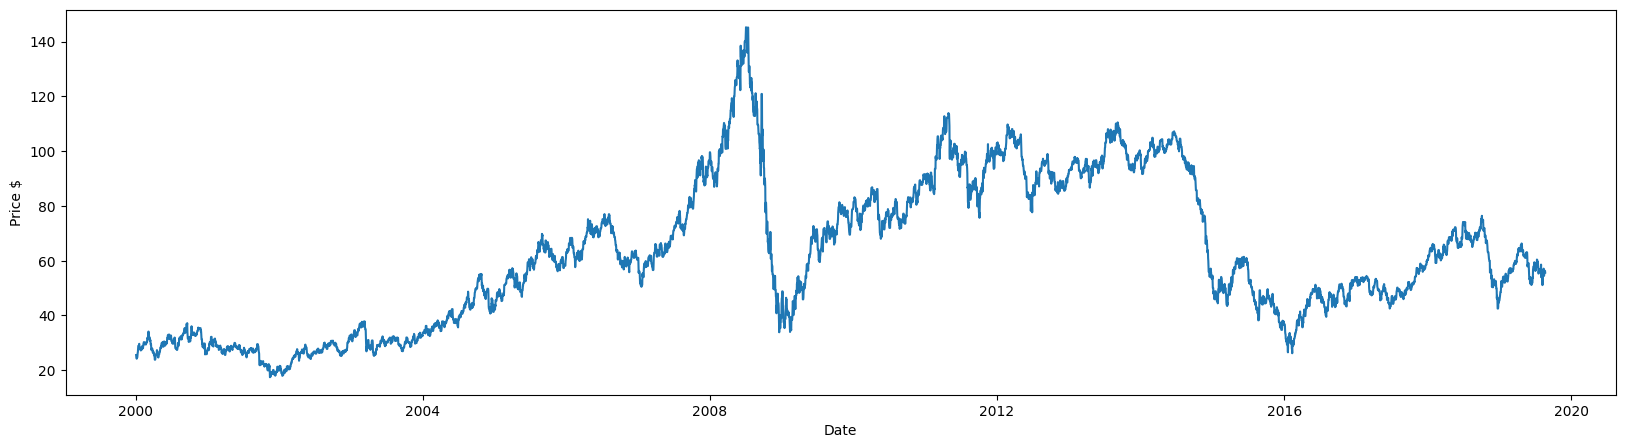

In [31]:
#LINE PLOT
plt.figure(figsize=(20,5))
plt.xlabel("Date")
plt.ylabel("Price $")
plt.plot(df.Price)

Outliner Detection


Text(0.5, 0, 'PRICE $')

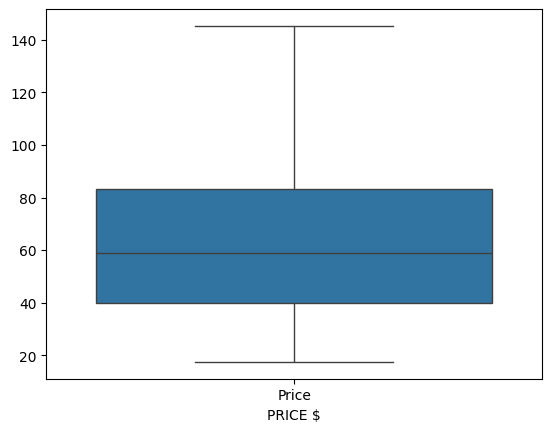

In [32]:
sns.boxplot(df)
plt.xlabel('PRICE $')

In [33]:
#Extracting Year and Month from the index

data['Year'] = pd.DatetimeIndex(data.index).year
data['Month'] = pd.DatetimeIndex(data.index).month

In [34]:
df.head()

,Price
date,
2000-01-04,25.55
2000-01-05,24.91
2000-01-06,24.78
2000-01-07,24.22
2000-01-08,24.67


Text(0, 0.5, 'PRICE $')

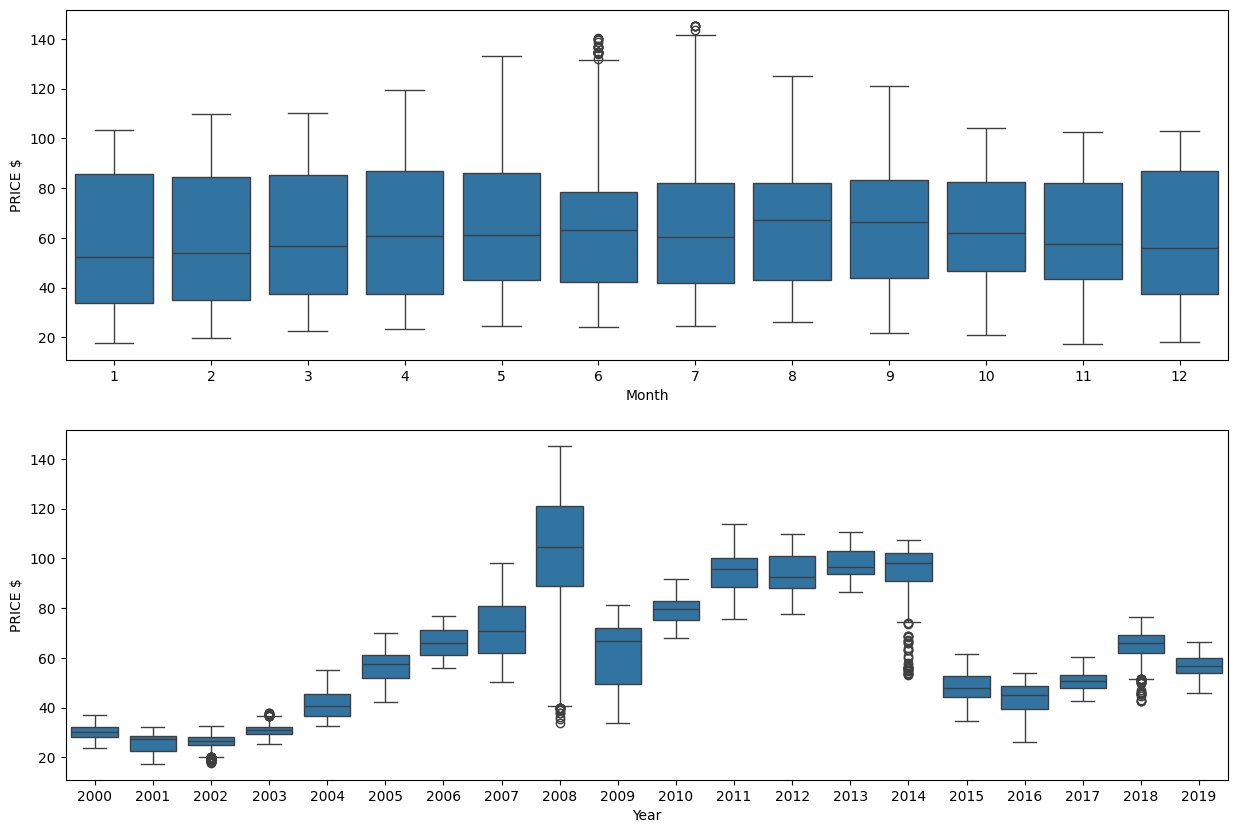

In [35]:
plt.figure(figsize=(15,10))
plt.subplot(211)
sns.boxplot(x="Month",y="Price",data=data)
plt.ylabel('PRICE $')

plt.subplot(212)
year_outlier=sns.boxplot(x="Year",y="Price",data=data)
plt.ylabel('PRICE $')

Observations



whiskers [<matplotlib.lines.Line2D object at 0x7a17d21ee410>, <matplotlib.lines.Line2D object at 0x7a17d21ee6b0>]
caps [<matplotlib.lines.Line2D object at 0x7a17d21ee950>, <matplotlib.lines.Line2D object at 0x7a17d21eebf0>]
boxes [<matplotlib.lines.Line2D object at 0x7a17d21ee170>]
medians [<matplotlib.lines.Line2D object at 0x7a17d21eee90>]
fliers [<matplotlib.lines.Line2D object at 0x7a17d21ef130>]
means []


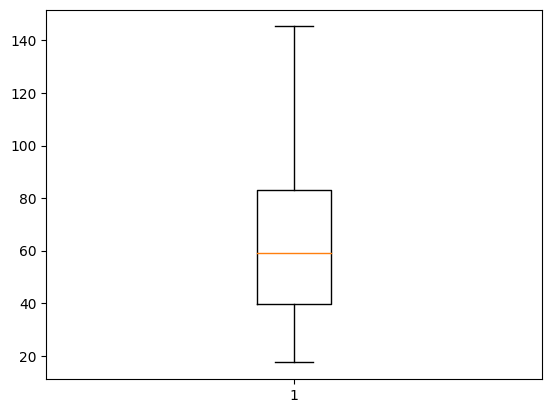

In [36]:
box=plt.boxplot(data['Price'])
type(box)
for i,j in box.items():
  print(i,j)

In [37]:
[item.get_ydata() for item in box['fliers']]

[array([], dtype=float64)]

Using Flooring and capping methods for treating outliers

In [38]:
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['Price']=np.where(data['Price']>upper_whisker,upper_whisker,np.where(data['Price']<lower_whisker,lower_whisker,data['Price']))

Treating as outliners being absent

In [39]:
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['Price']=np.where(data['Price']>upper_whisker,upper_whisker,np.where(data['Price']<lower_whisker,lower_whisker,data['Price']))

Treating as outliners being present

Heat Map Generation

<Axes: title={'center': 'Price $ Heatmap'}, xlabel='Month', ylabel='Year'>

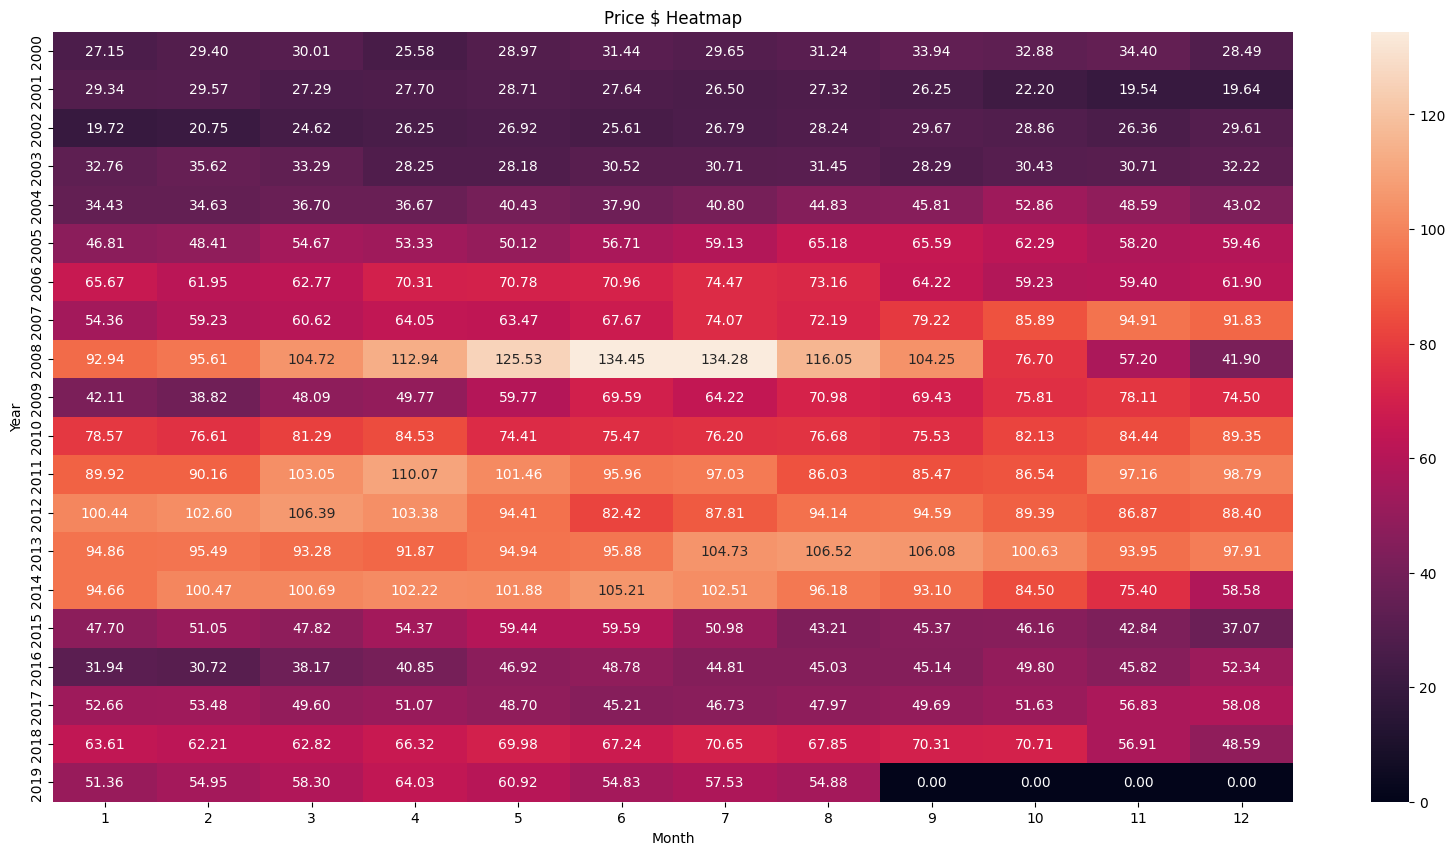

In [40]:
#HeatMap
plt.figure(figsize=(20,10))
table=pd.pivot_table(data=data, values='Price',index='Year', columns='Month',fill_value=0)
plt.title('Price $ Heatmap')
sns.heatmap(table, annot=True,fmt=".2f")

Observations:

1)The light color represents high price
2)Dark coolor represents low price
3)In our data we have only Jan data in 2020 hence remaining all is showing as 0
4)Similarly in year 2000 we have data from June hence those values are also 0
5)June, 2008 has high avg Oil price.
6)December, 2001 has low avg Oil price.
7)From 2000 to 2004 the Oil price is very low and from 2005 to 2014 the Oil price has increased. From 2014 to 2020 Oil price has reduced little